In [1]:
import matplotlib
rc_fonts = {
    "font.size": 14,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3dexp.db

from utils import get_by_expnames, get_by_ext, pretty

In [2]:
dataset = 'hdd%jpeg/flickr50k'
num_workers=8
hostname='cloudlet029'

df_all = pd.read_sql(
    'SELECT expname, basedir, avg_wall_ms, (1 / avg_wall_ms * 1000) as throughput, num_workers, avg_mbyteps as bandwidth, ext FROM EurekaExp \
        WHERE basedir LIKE %s AND hostname=%s AND num_workers=%s ORDER BY expname',
    s3dexp.db.engine,
    params=["%{}%".format(dataset), hostname, num_workers])

df_all

,expname,basedir,avg_wall_ms,throughput,num_workers,bandwidth,ext
0,baseline_face,/mnt/hdd/fast20/jpeg/flickr50k,67.661525,14.779448,8,1.113234,jpg
1,baseline_face-sorted,/mnt/hdd/fast20/jpeg/flickr50k,67.287506,14.861600,8,1.119422,jpg
2,baseline_hash,/mnt/hdd/fast20/jpeg/flickr50k,3.645050,274.344627,8,20.664492,jpg
3,baseline_hash-sorted,/mnt/hdd/fast20/jpeg/flickr50k,1.485169,673.324183,8,50.716874,jpg
4,baseline_hash8-cores,/mnt/hdd/fast20/jpeg/flickr50k,3.652511,273.784281,8,20.622285,jpg
5,baseline_redness,/mnt/hdd/fast20/jpeg/flickr50k,3.683041,271.514734,8,20.451335,jpg
6,baseline_redness-sorted,/mnt/hdd/fast20/jpeg/flickr50k,1.561886,640.251467,8,48.225734,jpg
7,baseline_redness8-cores,/mnt/hdd/fast20/jpeg/flickr50k,3.674602,272.138313,8,20.498305,jpg
8,baseline_resnet10,/mnt/hdd/fast20/jpeg/flickr50k,3.631389,275.376735,8,20.744282,jpg
9,baseline_resnet10-bk,/mnt/hdd/fast20/jpeg/flickr50k,5.461912,183.086067,8,13.790613,jpg


## App Throughput of Baseline vs Batch Optimized vs Ours (default parameters)

In [3]:
workloads = ['redness', 'hash', 'resnet10', 'face']

<IPython.core.display.Javascript object>


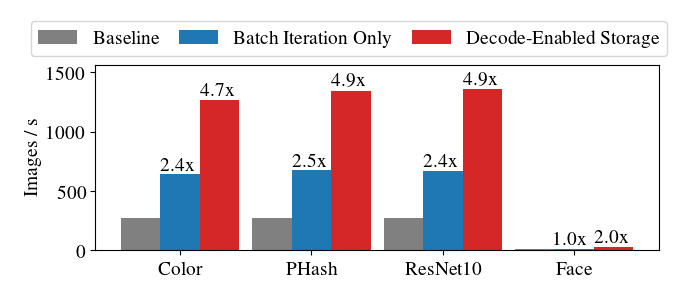

In [11]:
%matplotlib notebook

plt.figure(figsize=(7,3))

df_baseline = get_by_expnames(df_all, ['baseline_{}'.format(w) for w in workloads])
df_batch_only = get_by_expnames(df_all, ['baseline_{}-sorted'.format(w) for w in workloads])
df_ours = get_by_expnames(df_all, ['smart_{}-sorted'.format(w) for w in workloads])

# print df_baseline

ind = np.arange(len(workloads))
width = 0.3       

# baseline
x, y = ind, df_baseline['throughput'].values
plt.bar(x, y, width, label='Baseline', color='gray')

# batch optmized (baseline+sorted)
x, y = ind + width, df_batch_only['throughput'].values
plt.bar(x, y, width, label='Batch Iteration Only', color='tab:blue')

for x,y,s in zip(x, y, np.divide(y, df_baseline['throughput'].values)):
    plt.annotate("{:.1f}x".format(s), (x - .5*width, y + 30))

# smart
x, y = ind + width*2, df_ours['throughput'].values
plt.bar(x, y, width, label='Decode-Enabled Storage', color='tab:red')

for x,y,s in zip(x, y, np.divide(y, df_baseline['throughput'].values)):
    plt.annotate("{:.1f}x".format(s), (x - .5*width, y + 30))
    

plt.ylabel('Images / s')
plt.ylim(None, np.max(df_ours['throughput'])+200)

plt.xticks(ind + width, map(pretty, workloads))
plt.legend(bbox_to_anchor=(0.45, 1), loc='lower center', ncol=3, columnspacing=1)
# plt.legend(loc='best')

plt.tight_layout()
plt.savefig('micro-throughput.pdf', bbox_inches ='tight')

plt.show()

<IPython.core.display.Javascript object>


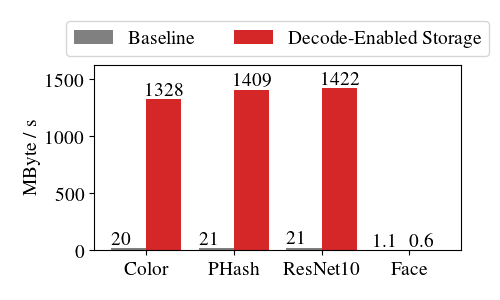

In [12]:
%matplotlib notebook

plt.figure(figsize=(5,3))

ind = np.arange(len(workloads))
width = 0.4     

# baseline
x, y = ind, df_baseline['bandwidth'].values
plt.bar(x, y, width, label='Baseline', color='gray')

for x,y,s in zip(x, y, y):
    if s > 2:
        plt.annotate("{:.0f}".format(s), (x - .5*width, y + 30))
    else:
        plt.annotate("{:.1f}".format(s), (x - .5*width, y + 30))

    
# smart
x, y = ind + width, df_ours['bandwidth'].values
plt.bar(x, y, width, label='Decode-Enabled Storage', color='tab:red')

for x,y,s in zip(x, y, y):
    if s > 2:
        plt.annotate("{:.0f}".format(s), (x - .5*width, y + 30))
    else:
        plt.annotate("{:.1f}".format(s), (x - .5*width, y + 30))
    

plt.ylabel('MByte / s')
plt.ylim(None, np.max(df_ours['bandwidth']) + 200)

plt.xticks(ind + width * .5, map(pretty, workloads), rotation=0)
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center', ncol=3)
# plt.legend(loc='best')

plt.tight_layout()
plt.savefig('micro-bandwidth.pdf', bbox_inches ='tight')

plt.show()

## App Throughput of Baseline-JPEG vs Basline-PPM vs Active Disk (default parameters)

In [96]:
dataset = 'flickr50k'
num_workers=8
hostname='cloudlet029'

df_all = pd.read_sql(
    'SELECT expname, basedir, avg_wall_ms, (1 / avg_wall_ms * 1000) as throughput, num_workers, avg_mbyteps as bandwidth, ext FROM EurekaExp \
        WHERE basedir LIKE %s AND hostname=%s AND num_workers=%s ORDER BY expname',
    s3dexp.db.engine,
    params=["%{}%".format(dataset), hostname, num_workers])

df_all

,expname,basedir,avg_wall_ms,throughput,num_workers,bandwidth,ext
0,baseline_face,/mnt/hdd/fast20/ppm/flickr50k,67.048279,14.914626,8,15.621163,ppm
1,baseline_face,/mnt/hdd/fast20/jpeg/flickr50k,67.661525,14.779448,8,1.113234,jpg
2,baseline_face-sorted,/mnt/hdd/fast20/jpeg/flickr50k,67.287506,14.861600,8,1.119422,jpg
3,baseline_hash,/mnt/hdd/fast20/ppm/flickr50k,14.042374,71.213028,8,74.586537,ppm
4,baseline_hash,/mnt/hdd/fast20/jpeg/flickr50k,3.645050,274.344627,8,20.664492,jpg
5,baseline_hash-sorted,/mnt/hdd/fast20/jpeg/flickr50k,1.485169,673.324183,8,50.716874,jpg
6,baseline_hash8-cores,/mnt/hdd/fast20/jpeg/flickr50k,3.652511,273.784281,8,20.622285,jpg
7,baseline_redness,/mnt/hdd/fast20/ppm/flickr50k,14.045472,71.197322,8,74.570087,ppm
8,baseline_redness,/mnt/hdd/fast20/jpeg/flickr50k,3.683041,271.514734,8,20.451335,jpg
9,baseline_redness-sorted,/mnt/hdd/fast20/jpeg/flickr50k,1.561886,640.251467,8,48.225734,jpg


In [97]:
workloads = ['redness', 'hash', 'resnet10', 'face']

df_baseline = get_by_expnames(df_all, ['baseline_{}'.format(w) for w in workloads])
df_baseline_jpeg = get_by_ext(df_baseline, 'jpg')
df_baseline_ppm = get_by_ext(df_baseline, 'ppm')
df_ours = get_by_expnames(df_all, ['smart_{}-sorted'.format(w) for w in workloads])

<IPython.core.display.Javascript object>


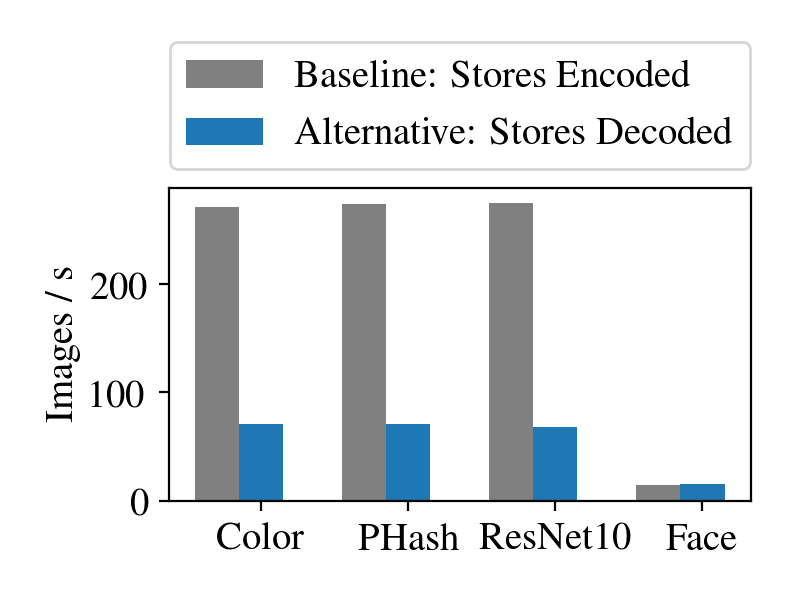

In [99]:
%matplotlib notebook

plt.figure(figsize=(4,3))

ind = np.arange(len(workloads))
width = 0.3       

# baseline-jpeg
x, y = ind, df_baseline_jpeg['throughput'].values
plt.bar(x, y, width, label='Baseline:  Stores Encoded', color='gray')

# baseline-ppm
x, y = ind + width, df_baseline_ppm['throughput'].values
plt.bar(x, y, width, label='Alternative: Stores Decoded')

# for x,y,s in zip(x, y, np.divide(y, df_baseline_jpeg['throughput'].values)):
#     plt.annotate("{:.1f}x".format(s), (x - .5*width, y + 30))
                 

# # smart
# x, y = ind + width*2, df_ours['throughput'].values
# plt.bar(x, y, width, label='Active Disk', color='tab:red')

# for x,y,s in zip(x, y, np.divide(y, df_baseline_jpeg['throughput'].values)):
#     plt.annotate("{:.1f}x".format(s), (x - .5*width, y + 30))
    

plt.ylabel('Images / s')
# plt.ylim(None, np.max(df_ours['throughput'])+200)

plt.xticks(ind + width, map(pretty, workloads))
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center', ncol=1, columnspacing=1)
# plt.legend(loc='best')

plt.tight_layout()
plt.savefig('micro-throughput-ext.pdf', bbox_inches ='tight')

plt.show()

<IPython.core.display.Javascript object>


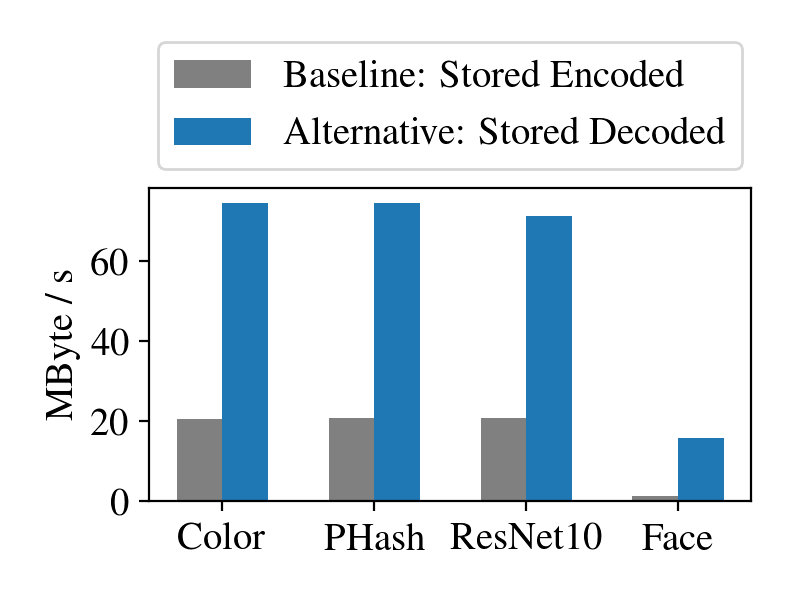

In [100]:
%matplotlib notebook

plt.figure(figsize=(4,3))

ind = np.arange(len(workloads))
width = 0.3     

# baseline-jpeg
x, y = ind, df_baseline_jpeg['bandwidth'].values
plt.bar(x, y, width, label='Baseline: Stored Encoded', color='gray')

# for x,y,s in zip(x, y, y):
#     plt.annotate("{:.1f}".format(s), (x - .5*width, y + 30))

# baseline-ppm
x, y = ind + width, df_baseline_ppm['bandwidth'].values
plt.bar(x, y, width, label='Alternative: Stored Decoded')

# for x,y,s in zip(x, y, y):
#     plt.annotate("{:.1f}".format(s), (x - .5*width, y + 30))
    
# # smart
# x, y = ind + width*2, df_ours['bandwidth'].values
# plt.bar(x, y, width, label='Active Disk', color='tab:red')

# for x,y,s in zip(x, y, y):
#     plt.annotate("{:.1f}".format(s), (x - .5*width, y + 30))
    

plt.ylabel('MByte / s')
# plt.ylim(None, np.max(df_ours['bandwidth']) + 200)

plt.xticks(ind + width * .5, map(pretty, workloads), rotation=0)
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center', ncol=1, columnspacing=1)
# plt.legend(loc='best')

plt.tight_layout()
plt.savefig('micro-bandwidth-ext.pdf', bbox_inches ='tight')

plt.show()